In [34]:
%matplotlib inline

# Solar Data Processing with Python

Now we have a grasp of the basics of python, but the whole reason for downloading python in the first place was to analyze solar data. Let's take a closer look at examples of solar data analysis. 

We will be using SunPy to access solar data. SunPy is a python package designed to interface between the powerful tools that exist in other Python Libraries with current repositories of solar data. With SunPy we will show how to: download solar data sets from the VSO an HEK, calibrate to industry standards, plot and overlay complimentary data sets. First, lets make sure that sunpy is up to date and then launch an ipython session. 

Now in ipython, we will import the sunpy library as well as the sunpy.data library. Notice that we have to call sunpy.data separately from the generic sunpy call. This is because importing sunpy only loads a subset of the "most commonly used" libraries. Thus if you want something specific, you will need to import it explicitly. 

We will also download the sample data set that is included in sunpy. 

In [61]:
import sunpy
import sunpy.data
sunpy.data.download_sample_data()

Unpacking: aia.lev1.193A_2013-09-21T16_00_06.84Z.image_lev1.fits


The sunpy sample_data includes many different solar data types that SunPy specifically supports. We will operate on the AIA image, but there are other examples at sunpy.org using the other sample datasets. 

# Overplotting a Coronal Hole on an AIA Image

Let's import some other libraries that we will need for this example. 

In [62]:
from __future__ import print_function, division #this is not needed in Python 3.x but needed in 2.7
from datetime import timedelta #computes differences in time
import numpy as np #numpy is a basic library that we almost always use

import matplotlib.pyplot as plt #plotting package
from matplotlib import patches #drawing shapes package
from astropy import units as u #units package

Notice that we are loading a units package (astropy.units). This is an extremely important and useful library to work with. It is required for effective interaction with Sunpy because most of the data we work with has units attached to it explicitly or implicitly (such as arcsec, sec, DN, etc.). Using units in our data analysis will help keep track of how we are manipulating data and the physical relevance of the results. 

In [63]:
import sunpy.map #SunPy specific image loading and display
import sunpy.data.sample #Sample data sets that we downloaded earlier
from sunpy.net import hek #accessing the HEK database 
from sunpy.time import parse_time #to convert times from strings to data objects
from sunpy.physics.solar_rotation import rot_hpc #Derotation algorithm

All of these packages are available in SunPy and will help us work with the solar data we have downloaded. 

Now let's load an AIA image from the sample data we downloaded into our map object we have just defined. 

In [64]:
aia_map = sunpy.map.Map(sunpy.data.sample.AIA_171_IMAGE)

sunpy.data.sample.AIA_171.IMAGE looks like a complicated object we are loading. In fact, it just points to a string as to where to find the sample data

In [65]:
sunpy.data.sample.AIA_171_IMAGE

'/Users/mskirk/sunpy/data/sample_data/AIA20110319_105400_0171.fits'

So another way we could write the same command is

In [66]:
aia_map = sunpy.map.Map('/Users/mskirk/sunpy/data/sample_data/AIA20110319_105400_0171.fits')

Let take a look at it using the peek( ) function:

/Users/mskirk/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


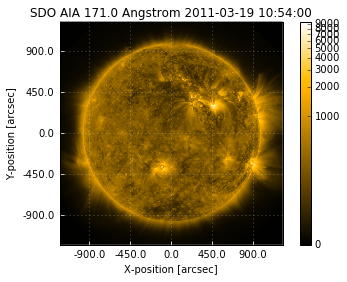

In [67]:
aia_map.peek()

We can interact with this image of the sun. Try resizing the window, or using the zoom tool (the magnifying glass). See how the plot automatically reacts? Click on the Home to get back to the original image. 

Let's say we are interested in coronal holes. We can interact with the HEK (www.lmsal.com/isolsearch) through SunPy and ask it about the coronal holes that were recorded in the HEK at the same time this image was taken. 

First we must create a HEK client:

In [68]:
hek_client = hek.HEKClient()

Next, we will specify a range of time that we are interested in. This is because the detection routines don't run for every AIA image that is recorded. Notice that we are defining things using the units hours. We could ask for seconds, days, or even years (not that we would want to). 

In [69]:
start_time = aia_map.date - timedelta(hours=2)
end_time = aia_map.date + timedelta(hours=2)

Both start_time and end_time are objects. Let's say that we want to know the start_time in a naturally readable format. We can just ask:

In [70]:
start_time.ctime()

'Sat Mar 19 08:54:00 2011'

Let's search the HEK database for coronal holes detected with the SPoCA feature detection suite.

In [71]:
responses = hek_client.query(hek.attrs.Time(start_time, end_time), hek.attrs.CH, hek.attrs.FRM.Name == 'SPoCA')

How many coronal holes did we get? 

In [72]:
len(responses)

7

But maybe we really don't want all of the holes detected, we just want the biggest hole that is within 60 degrees either north or south of the equator. We can sort our responses using a for loop to search all of our returned results. 

In [73]:
area = 0.0
for i, response in enumerate(responses): #initiating the loop 
    if response['area_atdiskcenter'] > area and np.abs(response['hgc_y']) < 60.0: #conditional statements
        area = response['area_atdiskcenter'] #recording the area
        response_index = i #recording the index with the largest area

We are taking advantage of two of the quantities returned from our HEK search: 'area_atdiskcenter' and 'hgc_y'. You can get a list of these keywords available by selecting the first in our list of returned responses and asking for the keywords associated with it:  

In [74]:
responses[0].keys()

[u'concept',
 u'frm_versionnumber',
 u'hrc_coord',
 u'hpc_bbox',
 u'area_atdiskcenter',
 u'event_mapurl',
 u'event_c1error',
 u'obs_dataprepurl',
 u'hgc_coord',
 u'frm_identifier',
 u'event_expires',
 u'intensmean',
 u'boundbox_c2ur',
 u'event_coordunit',
 u'gs_thumburl',
 u'obs_meanwavel',
 u'bound_ccnsteps',
 u'hgs_coord',
 u'bound_chaincode',
 u'frm_daterun',
 u'intensmedian',
 u'bound_ccstartc1',
 u'frm_paramset',
 u'bound_ccstartc2',
 u'event_coord2',
 u'event_coord3',
 u'event_coord1',
 u'event_importance',
 u'kb_archivdate',
 u'event_title',
 u'hrc_r',
 u'hgc_bbox',
 u'skel_chaincode',
 u'intenstotal',
 u'hrc_a',
 u'area_atdiskcenteruncert',
 u'event_probability',
 u'gs_movieurl',
 u'event_description',
 u'search_frm_name',
 u'eventtype',
 u'ar_polarity',
 u'obs_channelid',
 u'ar_mcintoshcls',
 u'frm_institute',
 u'frm_contact',
 u'ar_noaaclass',
 u'search_observatory',
 u'boundbox_c1ur',
 u'hgs_boundcc',
 u'boundbox_c2ll',
 u'area_unit',
 u'area_raw',
 u'hpc_coord',
 u'frm_name

Next let's select the largest coronal hole and extract its boundaries.

In [75]:
ch = responses[response_index] #we redefine the the largest hole as 'ch'
p1 = ch["hpc_boundcc"][9: -2] #grabbing the polygon verticies without some other junk
p2 = p1.split(',') #splitting it into coordinate pairs
p3 = [v.split(" ") for v in p2] #splitting the coordinate pairs into X and Y. 
ch_boundary = np.asarray([(eval(v[0]), eval(v[1])) for v in p3]) #inserting the coordinates into a NumPy array.
ch_date = parse_time(ch['event_starttime']) #extracting the CH detection date. 

The coronal hole was detected at a certain time. To correctly plot it on the AIA image, we need to rotate it to the map observation time.

In [76]:
rotated_boundary = np.zeros_like(ch_boundary) #creating an array with the same dimensions as the ch_boundary
n = ch_boundary.shape[0] #number of coordinates defining the boundary
for i in range(0, n):
    new_coords = rot_hpc(ch_boundary[i, 0] * u.arcsec, #rot_hpc rotates the coordinates note the units are specified.
                         ch_boundary[i, 1] * u.arcsec, #has the syntax rot_hpc(xx, yy, in_date, new_date)
                         ch_date,
                         aia_map.date)
    rotated_boundary[i, 0] = new_coords[0].value #reading the rotated coordinates into the array
    rotated_boundary[i, 1] = new_coords[1].value

Now we have the new coordinates for the coronal hole corrected to the time of our AIA image. Now let's plot the rotated coronal hole boundary on the AIA map.

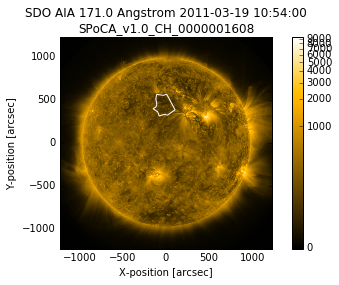

In [77]:
plt.ion() #setting up interactive plotting
fig = plt.figure() #initializing the figure
ax = plt.subplot() #creating plot axes 
aia_map.plot() #Displaying the AIA image
coronal_hole = patches.Polygon(rotated_boundary, color='white', fill=False) #generating the coronal hole boundary
ax.set_title('{0}\n{1}'.format(aia_map.name, ch['frm_specificid'])) #setting the axis title
ax.add_artist(coronal_hole) # plotting the coronal hole parimeter
plt.colorbar() #plotting a color bar
plt.tight_layout() #resizing to look nice

Notice how we defined the title for the plot using some nifty string formatting. We dynamically set up the format for the string and fill in it's contents at the same time. Let's break that down. This is how the formatting statement works: we define a generic string with two components '{ } { }'. Next, we define what goes in each component: '{0} {1}'.format('the zeroth component', 'the first component'}. Finally, we specify that we want a new line between the first and second component: '{0}\n{1}'.format('the zeroth component', 'the first component')

In [78]:
print('{0} {1}'.format('zero', 'one'))
print()
print('{0}\n{1}'.format('zero', 'one'))
print()
print('{1}\n{0}'.format('zero', 'one'))

zero one

zero
one

one
zero


# Downloading Data With SunPy Through The VSO

Data is the life blood of solar research. We have queried the HEK, but how do we search and download data from the VSO? SunPy has a VSO module to directly interact with the VSO so we can search, sort, and download solar data. First, we need to load the VSO client:

In [79]:
from sunpy.net import vso
client=vso.VSOClient()
from astropy import units as u #units package
import os #file management package

Now, let's construct a basic query and ask for all EIT images on Jan 1, 2001 with wavelengths between 170 and 180 Angstroms.  

In [80]:
qr = client.query(vso.attrs.Time('2001/1/1', '2001/1/2'), vso.attrs.Instrument('eit'),vso.attrs.Wave(170*u.AA, 180*u.AA))

Notice the syntax we are using similar to how we query the HEK database. To communicate the exact parameters we want the VSO to search over, we are using the vso attributes function (vso.attrs). To find out all of the VSO attributes that exist, you can type 'help(vso.attrs)', or look online at sunpy.org, or type 'vso.attrs.'+"tab" and see a list.

SunPy expects units to be specified where they make physical sense. So we must specify that the wavelengths we are looking for is in angstroms (rather than nanometers or even km). The units package specifies angstroms as units.AA.

How many results did we get?

In [81]:
len(qr)

4

What do the results look like? Let's print the first one. 

In [82]:
print(qr)

   Start Time [1]       End Time [1]    Source Instrument   Type  
------------------- ------------------- ------ ---------- --------
2001-01-01 01:00:14 2001-01-01 01:00:21   SOHO        EIT FULLDISK
2001-01-01 07:00:14 2001-01-01 07:00:21   SOHO        EIT FULLDISK
2001-01-01 13:00:15 2001-01-01 13:00:22   SOHO        EIT FULLDISK
2001-01-01 19:00:14 2001-01-01 19:00:21   SOHO        EIT FULLDISK


You can see that the results include the meta-data but not the data itself. Now let's download the images in our data query from the VSO to our current working directory. 

In [83]:
res=client.get(qr, path='{0}{1}'.format(os.getcwd(), '/{file}.fits'))

Each downloaded file with the filename '{file}' obtained from the VSO is appended with the suffix .fits. The '{file}' option uses the file name obtained by the VSO for each file. The formatting command will dump the files into the current working directory. If you want to change the directory where the files get directed, replace 'os.getcwd()' to the destination (e.g. '/Users/Kirk/Data/AIA'). 